The following code tests the MALA sampler on a toy problem of 1-dimensional Bayesian Linear Regression.

In [1]:
%cd "../../"
import torch
import numpy as np
from matplotlib import pyplot as plt

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


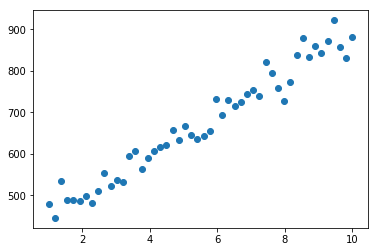

In [2]:

x_data = torch.Tensor([[x] for x in np.linspace(1, 10)])
w_true = 50
b_true = 400
y_data = x_data*w_true + b_true
y_data += torch.randn(y_data.size())*30
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))


In [3]:

# class MODEL(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = torch.nn.Linear(1, 100)
#         self.linear2 = torch.nn.Linear(100, 1)
        
#     def forward(self, x):
#         y = self.linear(x)
#         z = self.linear2(y)
#         return y
    
class MODEL(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y

model = MODEL()

In [4]:
from samplers.metrics import eval_full_hessian, SoftAbsMetric

def hess_closure():
    return eval_full_hessian(torch.autograd.grad(closure(), model.parameters(), create_graph=True), model.parameters())

metric = SoftAbsMetric(closure=hess_closure)

In [5]:
from samplers import MALA, SGLD, MMALA
# sampler = MALA(model.parameters(), lr = 0.0001, add_noise=True)
# sampler = SGLD(model.parameters(), lr0=0.003, gamma=0.55, t0=100, alpha=0.1)
sampler = MMALA(model.parameters(), metric_obj=metric, lr=0.00001)


<class 'dict'>


In [6]:
def closure():
    criterion = torch.nn.MSELoss(reduction='sum')
    loss = criterion(model(x_data), y_data)
    lambda_ = 0.3
    for p in model.parameters():
        loss += lambda_ * p.pow(2).sum()
    return loss


In [7]:
chain, logp_array = sampler.sample(closure, burn_in=1000, num_samples=200)


Burn-in phase started
Burn-in iter 1
Burn-in iter 2
Burn-in iter 3
Burn-in iter 4
Burn-in iter 5
Burn-in iter 6
Burn-in iter 7
Burn-in iter 8
Burn-in iter 9
Burn-in iter 10
Burn-in iter 11
Burn-in iter 12
Burn-in iter 13
Burn-in iter 14
Burn-in iter 15
Burn-in iter 16
Burn-in iter 17
Burn-in iter 18
Burn-in iter 19
Burn-in iter 20
Burn-in iter 21
Burn-in iter 22
Burn-in iter 23
Burn-in iter 24
Burn-in iter 25
Burn-in iter 26
Burn-in iter 27
Burn-in iter 28


RuntimeError: Rejection step copying does not work

In [ ]:
# plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]))
plt.hist([i[0][0][0][0][0] for i in chain if i[1]], bins=100)
np.mean([i[0][0][0][0][0] for i in chain if i[1]])

In [ ]:
plt.hist([i[0][0][1][0] for i in chain if i[1]], bins=100)

np.mean([i[0][0][1][0] for i in chain if i[1]])

In [ ]:
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))
plt.plot(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]), c='k')


In [ ]:
from samplers.utils import eval_hessian

hess = eval_hessian(torch.autograd.grad(closure(), model.parameters(), create_graph=True), model)

In [ ]:
chain
